(786, 1200, 3)


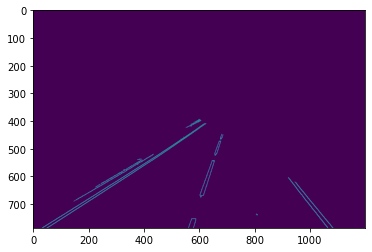

In [26]:
#Initial iteration - CV2 project / https://www.youtube.com/watch?v=G0cHyaP9HaQ&t=221s

import matplotlib.pylab as plt
import cv2
import numpy as np

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

image = cv2.imread('Road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
height = image.shape[0]
width = image.shape[1]
region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)
lines = cv2.HoughLinesP(cropped_image,
                        rho=6,
                        theta=np.pi/180,
                        threshold=160,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=25)

image_with_lines = drow_the_lines(image, lines)

plt.imshow(cropped_image)
plt.show()

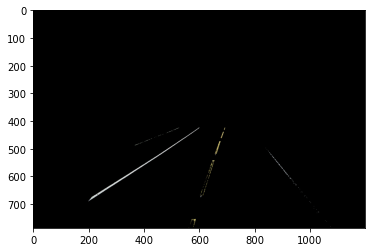

In [28]:
#Second iteration

import matplotlib.pylab as plt
import cv2
import numpy as np

image = cv2.imread('Road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (width*0.1, height),
    (width*0.35, height/1.85),
    (width*0.65, height/1.85),
    (width*0.9, height) ]

def region_of_interest(img, vertices):
    #ROI and cropping
    mask1 = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask1, vertices, match_mask_color)
    masked_image1 = cv2.bitwise_and(img, mask1)   
    # white color mask
    lower = np.uint8([200, 200, 200])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(masked_image1, lower, upper)
    # yellow color mask
    lower = np.uint8([190, 190,   0])
    upper = np.uint8([255, 255, 255])
    yellow_mask = cv2.inRange(masked_image1, lower, upper)
    # combine the mask - here it is
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked2 = cv2.bitwise_and(masked_image1, masked_image1, mask = mask)
    return masked2

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

cropped_image = region_of_interest(image,
                    np.array([region_of_interest_vertices], np.int32),)

gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)   

blur_image = cv2.blur(gray_image, (10,10))

canny_image = cv2.Canny(blur_image, 50, 150)

lines = cv2.HoughLinesP(canny_image,
                        rho=6,
                        theta=np.pi/180,
                        threshold=160,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=25)

image_with_lines = drow_the_lines(image, lines)

plt.imshow(cropped_image)
plt.show()

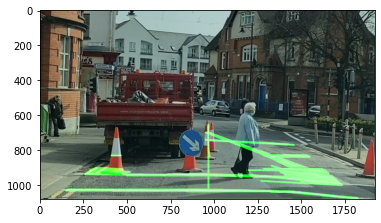

In [65]:
#Third iteration

import matplotlib.pylab as plt
import cv2
import numpy as np

image = cv2.imread('Test4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (width*0.05, height),
    (width*0.35, height/1.85),
    (width*0.65, height/1.85),
    (width*0.95, height) ]

def region_of_interest(img, vertices):
    #ROI and cropping
    mask1 = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask1, vertices, match_mask_color)
    masked_image1 = cv2.bitwise_and(img, mask1)   
    # white color mask
    lower = np.uint8([200, 200, 200])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(masked_image1, lower, upper)
    # yellow color mask
    lower = np.uint8([190, 190,   0])
    upper = np.uint8([255, 255, 255])
    yellow_mask = cv2.inRange(masked_image1, lower, upper)
    # combine the mask - here it is
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked2 = cv2.bitwise_and(masked_image1, masked_image1, mask = mask)
    return masked2

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

cropped_image = region_of_interest(image,
                np.array([region_of_interest_vertices], np.int32),)

gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)

lines = cv2.HoughLinesP(gray_image,
                        rho=2,
                        theta=np.pi/180,
                        threshold=350,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=150)

image_with_lines = drow_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()

In [66]:
#Video capturing

import cv2
import numpy as np

def region_of_interest(img, vertices):
    #ROI and cropping
    mask1 = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask1, vertices, match_mask_color)
    masked_image1 = cv2.bitwise_and(img, mask1)   
    # white color mask
    lower = np.uint8([200, 200, 200])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(masked_image1, lower, upper)
    # yellow color mask
    lower = np.uint8([170, 170,   0])
    upper = np.uint8([255, 255, 255])
    yellow_mask = cv2.inRange(masked_image1, lower, upper)
    # combine the mask - here it is
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked2 = cv2.bitwise_and(masked_image1, masked_image1, mask = mask)
    return masked2

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img


def process(image):
    height = image.shape[0]
    width = image.shape[1]    
    region_of_interest_vertices = [
    (width*0.05, height),
    (width*0.35, height/1.75),
    (width*0.65, height/1.75),
    (width*0.95, height) ]

    cropped_image = region_of_interest(image,
                    np.array([region_of_interest_vertices], np.int32),)
    gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
    
    lines = cv2.HoughLinesP(gray_image,
                            rho=2,
                            theta=np.pi/180,
                            threshold=125,
                            lines=np.array([]),
                            minLineLength=40,
                            maxLineGap=100)
    
    if lines is None:
        return image
    
    image_with_lines = drow_the_lines(image, lines)
    return image_with_lines


cap = cv2.VideoCapture('test1.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    frame = process(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()